# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Data loading and Cleaning

In [2]:
data = pd.read_csv("bank-loan (1).csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
age         850 non-null int64
ed          850 non-null int64
employ      850 non-null int64
address     850 non-null int64
income      850 non-null int64
debtinc     850 non-null float64
creddebt    850 non-null float64
othdebt     850 non-null float64
default     700 non-null float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [4]:
data.shape

(850, 9)

In [5]:
data.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


# Missing Value Analysis

In [6]:
data_mv = pd.DataFrame(data.isnull().sum())

In [7]:
data_mv

,0
age,0
ed,0
employ,0
address,0
income,0
debtinc,0
creddebt,0
othdebt,0
default,150


In [8]:
data_mv=data_mv.reset_index()

In [9]:
data_mv=data_mv.rename(columns ={"index":"variables",0:"percentage"})
data_mv

,variables,percentage
0,age,0
1,ed,0
2,employ,0
3,address,0
4,income,0
5,debtinc,0
6,creddebt,0
7,othdebt,0
8,default,150


In [10]:
data_mv["percentage"] = (data_mv["percentage"]/850)*100
data_mv

,variables,percentage
0,age,0.000000
1,ed,0.000000
2,employ,0.000000
3,address,0.000000
4,income,0.000000
5,debtinc,0.000000
6,creddebt,0.000000
7,othdebt,0.000000
8,default,17.647059


In [11]:
missing_rows= data[data["default"].isnull()==True]

In [12]:
missing_rows

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
700,36,1,16,13,32,10.9,0.544128,2.943872,NaN
701,50,1,6,27,21,12.9,1.316574,1.392426,NaN
702,40,1,9,9,33,17.0,4.880700,0.729300,NaN
703,31,1,5,7,23,2.0,0.046000,0.414000,NaN
704,29,1,4,0,24,7.8,0.866736,1.005264,NaN
...,...,...,...,...,...,...,...,...,...
845,34,1,12,15,32,2.7,0.239328,0.624672,NaN
846,32,2,12,11,116,5.7,4.026708,2.585292,NaN
847,48,1,13,11,38,10.8,0.722304,3.381696,NaN
848,35,2,1,11,24,7.8,0.417456,1.454544,NaN


In [13]:
data_new=data.drop(index = missing_rows.index)

In [14]:
data_new

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1.0
696,29,2,6,4,21,11.5,0.369495,2.045505,0.0
697,33,1,15,3,32,7.6,0.491264,1.940736,0.0
698,45,1,19,22,77,8.4,2.302608,4.165392,0.0


In [15]:
cnames = data.columns
cnames

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [16]:
obj_names = []
num_cnames =[]
for i in cnames: 
    if data[i].dtype == "int64" or data[i].dtype=="float64":
        num_cnames.append(i)
    else:
        obj_names.append(i)

In [17]:
print(num_cnames,obj_names)

['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt', 'default'] []


In [18]:
num_cnames.remove("default")

# Outlier Analysis

In [19]:
num_cnames

['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']

(array([ 42.,  95., 105., 119.,  78., 121.,  58.,  44.,  25.,  13.]),
 array([20. , 23.6, 27.2, 30.8, 34.4, 38. , 41.6, 45.2, 48.8, 52.4, 56. ]),
 <a list of 10 Patch objects>)

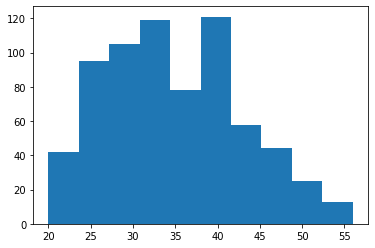

In [20]:
plt.hist(data_new["age"])

(array([372.,   0., 198.,   0.,   0.,  87.,   0.,  38.,   0.,   5.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

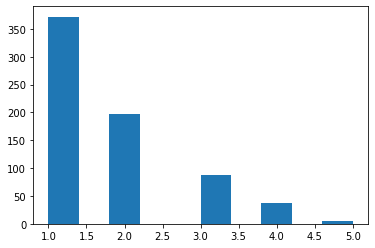

In [21]:
plt.hist(data_new["ed"])

(array([197., 129., 114.,  86.,  60.,  54.,  25.,  22.,   6.,   7.]),
 array([ 0. ,  3.1,  6.2,  9.3, 12.4, 15.5, 18.6, 21.7, 24.8, 27.9, 31. ]),
 <a list of 10 Patch objects>)

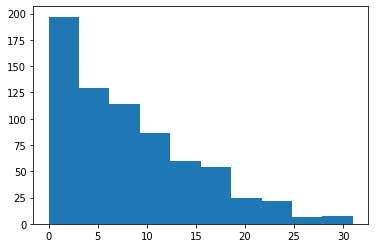

In [22]:
plt.hist(data_new["employ"])

(array([214., 126., 144.,  65.,  56.,  46.,  25.,  20.,   1.,   3.]),
 array([ 0. ,  3.4,  6.8, 10.2, 13.6, 17. , 20.4, 23.8, 27.2, 30.6, 34. ]),
 <a list of 10 Patch objects>)

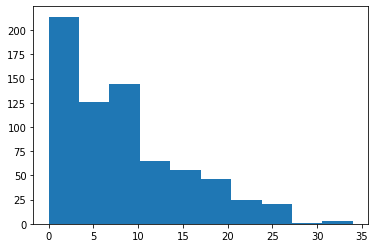

In [23]:
plt.hist(data_new["address"])

(array([542., 115.,  26.,   9.,   3.,   4.,   0.,   0.,   0.,   1.]),
 array([ 14. ,  57.2, 100.4, 143.6, 186.8, 230. , 273.2, 316.4, 359.6,
        402.8, 446. ]),
 <a list of 10 Patch objects>)

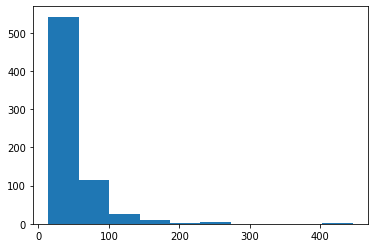

In [24]:
plt.hist(data_new["income"])

(array([138., 209., 135., 102.,  60.,  28.,  17.,   6.,   4.,   1.]),
 array([ 0.4 ,  4.49,  8.58, 12.67, 16.76, 20.85, 24.94, 29.03, 33.12,
        37.21, 41.3 ]),
 <a list of 10 Patch objects>)

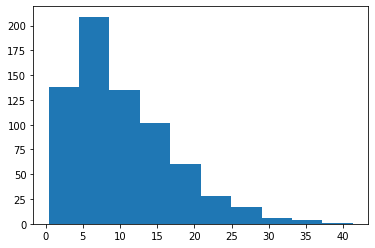

In [25]:
plt.hist(data_new["debtinc"])

(array([543., 100.,  35.,  11.,   4.,   1.,   1.,   4.,   0.,   1.]),
 array([1.16960000e-02, 2.06665740e+00, 4.12161880e+00, 6.17658020e+00,
        8.23154160e+00, 1.02865030e+01, 1.23414644e+01, 1.43964258e+01,
        1.64513872e+01, 1.85063486e+01, 2.05613100e+01]),
 <a list of 10 Patch objects>)

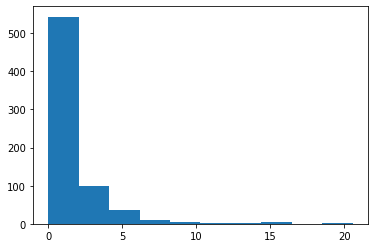

In [26]:
plt.hist(data_new["creddebt"])

(array([452., 147.,  50.,  26.,  12.,   4.,   6.,   1.,   1.,   1.]),
 array([ 0.045584 ,  2.7443856,  5.4431872,  8.1419888, 10.8407904,
        13.539592 , 16.2383936, 18.9371952, 21.6359968, 24.3347984,
        27.0336   ]),
 <a list of 10 Patch objects>)

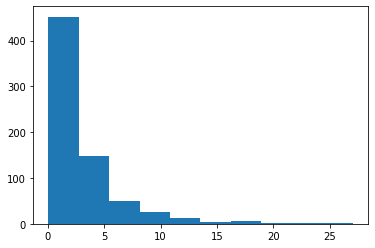

In [27]:
plt.hist(data_new["othdebt"])

In [28]:
for i in ["ed","othdebt","creddebt","debtinc","income","address","employ"]:
    q75,q25 = np.percentile(data.loc[:,i],[75,25])
    iqr = q75-q25
    min_m = q25-iqr*1.5
    max_m = q75+iqr*1.5
    data = data.drop(data[data.loc[:,i]<min_m].index) 
    data = data.drop(data[data.loc[:,i]>max_m].index)        

In [29]:
num_cnames

['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']

(array([ 42.,  95., 105., 119.,  78., 121.,  58.,  44.,  25.,  13.]),
 array([20. , 23.6, 27.2, 30.8, 34.4, 38. , 41.6, 45.2, 48.8, 52.4, 56. ]),
 <a list of 10 Patch objects>)

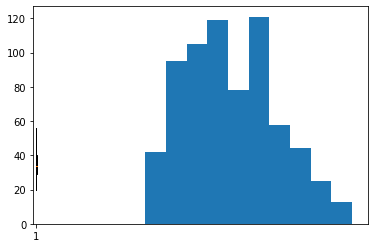

In [30]:
plt.boxplot(data_new["age"])
plt.hist(data_new["age"])

(array([372.,   0., 198.,   0.,   0.,  87.,   0.,  38.,   0.,   5.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

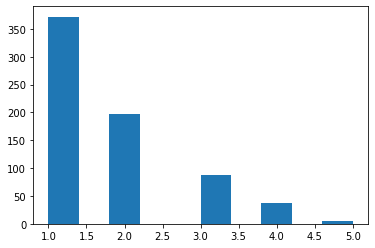

In [31]:
plt.hist(data_new["ed"])

(array([197., 129., 114.,  86.,  60.,  54.,  25.,  22.,   6.,   7.]),
 array([ 0. ,  3.1,  6.2,  9.3, 12.4, 15.5, 18.6, 21.7, 24.8, 27.9, 31. ]),
 <a list of 10 Patch objects>)

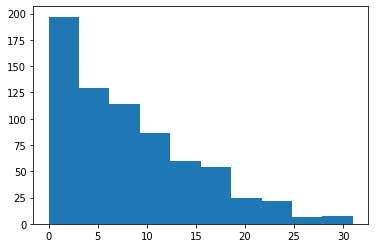

In [32]:
plt.hist(data_new["employ"])

(array([214., 126., 144.,  65.,  56.,  46.,  25.,  20.,   1.,   3.]),
 array([ 0. ,  3.4,  6.8, 10.2, 13.6, 17. , 20.4, 23.8, 27.2, 30.6, 34. ]),
 <a list of 10 Patch objects>)

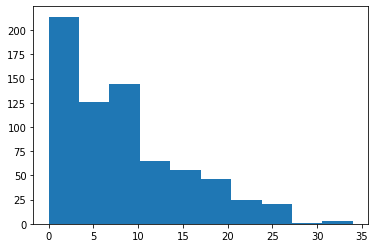

In [33]:
plt.hist(data_new["address"])

(array([542., 115.,  26.,   9.,   3.,   4.,   0.,   0.,   0.,   1.]),
 array([ 14. ,  57.2, 100.4, 143.6, 186.8, 230. , 273.2, 316.4, 359.6,
        402.8, 446. ]),
 <a list of 10 Patch objects>)

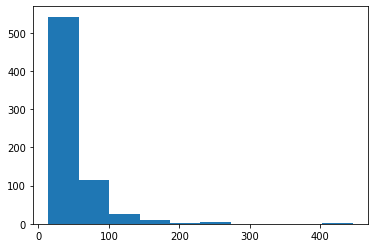

In [34]:
plt.hist(data_new["income"])

(array([138., 209., 135., 102.,  60.,  28.,  17.,   6.,   4.,   1.]),
 array([ 0.4 ,  4.49,  8.58, 12.67, 16.76, 20.85, 24.94, 29.03, 33.12,
        37.21, 41.3 ]),
 <a list of 10 Patch objects>)

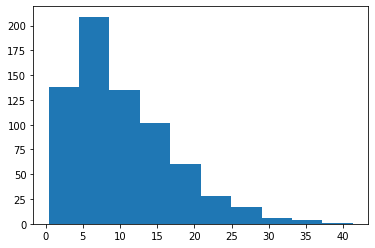

In [35]:
plt.hist(data_new["debtinc"])

(array([543., 100.,  35.,  11.,   4.,   1.,   1.,   4.,   0.,   1.]),
 array([1.16960000e-02, 2.06665740e+00, 4.12161880e+00, 6.17658020e+00,
        8.23154160e+00, 1.02865030e+01, 1.23414644e+01, 1.43964258e+01,
        1.64513872e+01, 1.85063486e+01, 2.05613100e+01]),
 <a list of 10 Patch objects>)

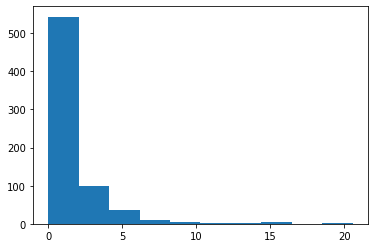

In [36]:
plt.hist(data_new["creddebt"])

(array([452., 147.,  50.,  26.,  12.,   4.,   6.,   1.,   1.,   1.]),
 array([ 0.045584 ,  2.7443856,  5.4431872,  8.1419888, 10.8407904,
        13.539592 , 16.2383936, 18.9371952, 21.6359968, 24.3347984,
        27.0336   ]),
 <a list of 10 Patch objects>)

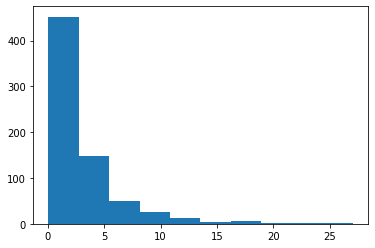

In [37]:
plt.hist(data_new["othdebt"])

{'whiskers': [<matplotlib.lines.Line2D at 0x27ee8cb02c8>,
 'caps': [<matplotlib.lines.Line2D at 0x27ee8cb0b88>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ee8cac808>],
 'medians': [<matplotlib.lines.Line2D at 0x27ee8cb4b08>],
 'fliers': [<matplotlib.lines.Line2D at 0x27ee8cba948>],
 'means': []}

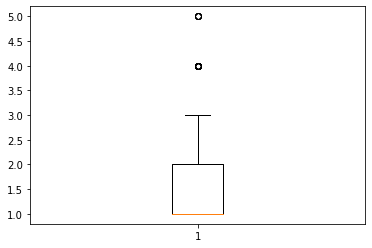

In [38]:
plt.boxplot(data_new["ed"])

{'whiskers': [<matplotlib.lines.Line2D at 0x27ee8d20b88>,
 'caps': [<matplotlib.lines.Line2D at 0x27ee8d23b48>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ee8d1bfc8>],
 'medians': [<matplotlib.lines.Line2D at 0x27ee8d28ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x27ee8d28c08>],
 'means': []}

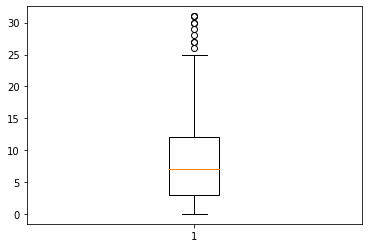

In [39]:
plt.boxplot(data_new["employ"])

{'whiskers': [<matplotlib.lines.Line2D at 0x27ee8d8ae88>,
 'caps': [<matplotlib.lines.Line2D at 0x27ee8d4de48>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ee8d8a408>],
 'medians': [<matplotlib.lines.Line2D at 0x27ee8d92dc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x27ee8d92f08>],
 'means': []}

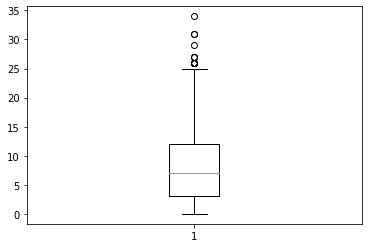

In [40]:
plt.boxplot(data_new["address"])

{'whiskers': [<matplotlib.lines.Line2D at 0x27ee8df58c8>,
 'caps': [<matplotlib.lines.Line2D at 0x27ee8dff888>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ee8df4dc8>],
 'medians': [<matplotlib.lines.Line2D at 0x27ee8e03808>],
 'fliers': [<matplotlib.lines.Line2D at 0x27ee8e03f88>],
 'means': []}

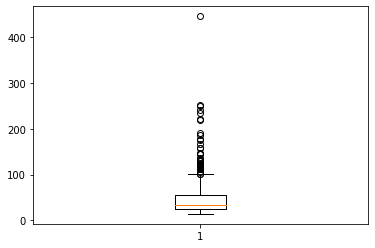

In [41]:
plt.boxplot(data_new["income"])

{'whiskers': [<matplotlib.lines.Line2D at 0x27ee8e63548>,
 'caps': [<matplotlib.lines.Line2D at 0x27ee8e63e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ee8e5fa48>],
 'medians': [<matplotlib.lines.Line2D at 0x27ee8e66dc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x27ee8e6bc08>],
 'means': []}

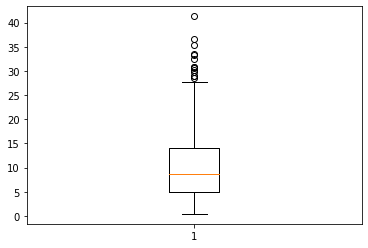

In [42]:
plt.boxplot(data_new["debtinc"])

{'whiskers': [<matplotlib.lines.Line2D at 0x27ee8ed5408>,
 'caps': [<matplotlib.lines.Line2D at 0x27ee8ed5d08>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ee8ed29c8>],
 'medians': [<matplotlib.lines.Line2D at 0x27ee8ed9c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x27ee8eddbc8>],
 'means': []}

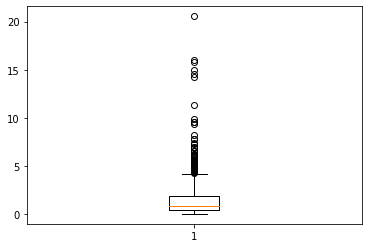

In [43]:
plt.boxplot(data_new["creddebt"])

{'whiskers': [<matplotlib.lines.Line2D at 0x27ee8f39448>,
 'caps': [<matplotlib.lines.Line2D at 0x27ee8f39d48>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ee8f35988>],
 'medians': [<matplotlib.lines.Line2D at 0x27ee8f3ccc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x27ee8f42b08>],
 'means': []}

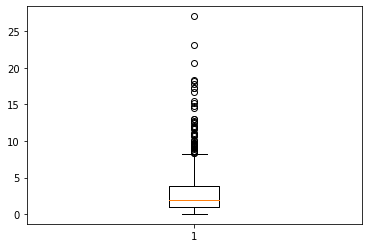

In [44]:
plt.boxplot(data_new["othdebt"])

# Correlation Analysis

In [45]:
corr= data.loc[:,num_cnames].corr()

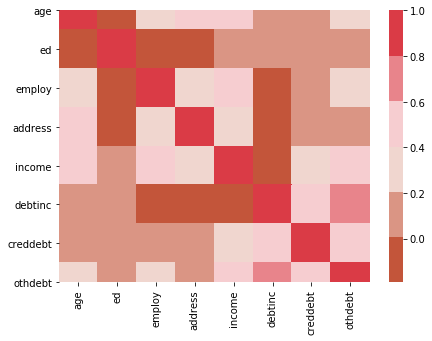

In [46]:
f,ax = plt.subplots(figsize=(7,5))

sns.heatmap(corr,mask=np.zeros_like(corr,dtype = np.bool),cmap=sns.diverging_palette(20,10),square=True,ax=ax)

In [47]:
data_new

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1.0
696,29,2,6,4,21,11.5,0.369495,2.045505,0.0
697,33,1,15,3,32,7.6,0.491264,1.940736,0.0
698,45,1,19,22,77,8.4,2.302608,4.165392,0.0


In [48]:
data_new.drop(["income"],axis=1,inplace=True)
data_new.drop(["othdebt"],axis=1,inplace=True)

In [49]:
data_new

,age,ed,employ,address,debtinc,creddebt,default
0,41,3,17,12,9.3,11.359392,1.0
1,27,1,10,6,17.3,1.362202,0.0
2,40,1,15,14,5.5,0.856075,0.0
3,41,1,15,14,2.9,2.658720,0.0
4,24,2,2,0,17.3,1.787436,1.0
...,...,...,...,...,...,...,...
695,36,2,6,15,4.6,0.262062,1.0
696,29,2,6,4,11.5,0.369495,0.0
697,33,1,15,3,7.6,0.491264,0.0
698,45,1,19,22,8.4,2.302608,0.0


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x = data_new.iloc[:,0:6]
x

,age,ed,employ,address,debtinc,creddebt
0,41,3,17,12,9.3,11.359392
1,27,1,10,6,17.3,1.362202
2,40,1,15,14,5.5,0.856075
3,41,1,15,14,2.9,2.658720
4,24,2,2,0,17.3,1.787436
...,...,...,...,...,...,...
695,36,2,6,15,4.6,0.262062
696,29,2,6,4,11.5,0.369495
697,33,1,15,3,7.6,0.491264
698,45,1,19,22,8.4,2.302608


In [52]:
y = data_new.iloc[:,6]
y

0      1.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
695    1.0
696    0.0
697    0.0
698    0.0
699    0.0
Name: default, Length: 700, dtype: float64

In [53]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.20, random_state=42)

In [54]:
answers = pd.DataFrame()

In [55]:
# applying logstic regression 
import statsmodels.api as sm
logit = sm.Logit(y_train,x_train).fit()
answers["logistic_reg"] = logit.predict(x_test)
answers['logistic_reg'] = answers['logistic_reg'].apply(lambda x: 1 if x >= 0.5 else 0)
crosstab_logistic_regression = pd.crosstab(y_test,answers["logistic_reg"])
print("true positive ",crosstab_logistic_regression.iloc[0,0])
tp=crosstab_logistic_regression.iloc[0,0]
print("true negative ",crosstab_logistic_regression.iloc[1,1])
tn=crosstab_logistic_regression.iloc[1,1]
print("false positive ",crosstab_logistic_regression.iloc[1,0])
fp=crosstab_logistic_regression.iloc[1,0]
print("false negative ",crosstab_logistic_regression.iloc[0,1])
fn=crosstab_logistic_regression.iloc[0,1]
print("specificity :- ",tn/(tn+fp)*100)
print("recall :- ",tp/(tp+fn)*100)
print("accuracy :- ",(tp+tn)/len(answers['logistic_reg'])*100)


Optimization terminated successfully.
         Current function value: 0.417493
         Iterations 7
true positive  97
true negative  23
false positive  15
false negative  5
specificity :-  60.526315789473685
recall :-  95.09803921568627
accuracy :-  85.71428571428571


In [56]:
#applying random forest
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(n_estimators=200).fit(x_train,y_train)
answers["random_forest"]=rm.predict(x_test)
answers['random_forest'] = answers['random_forest'].apply(lambda x: 1 if x >= 0.5 else 0)
crosstab_random_forest = pd.crosstab(y_test,answers["random_forest"])
print("true positive ",crosstab_random_forest.iloc[0,0])
tp=crosstab_random_forest.iloc[0,0]
print("true negative ",crosstab_random_forest.iloc[1,1])
tn=crosstab_random_forest.iloc[1,1]
print("false positive ",crosstab_random_forest.iloc[1,0])
fp=crosstab_random_forest.iloc[1,0]
print("false negative ",crosstab_random_forest.iloc[0,1])
fn=crosstab_random_forest.iloc[0,1]
print("specificity :- ",tn/(tn+fp)*100)
print("recall :- ",tp/(tp+fn)*100)
print("accuracy :- ",(tp+tn)/len(answers['random_forest'])*100)

true positive  97
true negative  21
false positive  17
false negative  5
specificity :-  55.26315789473685
recall :-  95.09803921568627
accuracy :-  84.28571428571429


In [57]:
# naive bayes
nb = GaussianNB().fit(x_train,y_train)
answers["naive_bayes"] = nb.predict(x_test)
answers['naive_bayes'] = answers['naive_bayes'].apply(lambda x: 1 if x >= 0.5 else 0)
crosstab_naive_bayes = pd.crosstab(y_test,answers["naive_bayes"])
print("true positive ",crosstab_naive_bayes.iloc[0,0])
tp=crosstab_naive_bayes.iloc[0,0]
print("true negative ",crosstab_naive_bayes.iloc[1,1])
tn=crosstab_naive_bayes.iloc[1,1]
print("false positive ",crosstab_naive_bayes.iloc[1,0])
fp=crosstab_naive_bayes.iloc[1,0]
print("false negative ",crosstab_naive_bayes.iloc[0,1])
fn=crosstab_naive_bayes.iloc[0,1]
print("specificity :- ",tn/(tn+fp)*100)
print("recall :- ",tp/(tp+fn)*100)
print("accuracy :- ",(tp+tn)/len(answers['naive_bayes'])*100)

true positive  95
true negative  19
false positive  19
false negative  7
specificity :-  50.0
recall :-  93.13725490196079
accuracy :-  81.42857142857143


In [58]:
# knn classifier
knn = KNeighborsClassifier(n_neighbors=5).fit(x_train,y_train)
answers["knn"] = knn.predict(x_test)
answers['knn'] = answers['knn'].apply(lambda x: 1 if x >= 0.5 else 0)
crosstab_knn = pd.crosstab(y_test,answers["knn"])
print("true positive ",crosstab_knn.iloc[0,0])
tp=crosstab_knn.iloc[0,0]
print("true negative ",crosstab_knn.iloc[1,1])
tn=crosstab_knn.iloc[1,1]
print("false positive ",crosstab_knn.iloc[1,0])
fp=crosstab_knn.iloc[1,0]
print("false negative ",crosstab_knn.iloc[0,1])
fn=crosstab_knn.iloc[0,1]
print("specificity :- ",tn/(tn+fp)*100)
print("recall :- ",tp/(tp+fn)*100)
print("accuracy :- ",(tp+tn)/len(answers['naive_bayes'])*100)

true positive  95
true negative  13
false positive  25
false negative  7
specificity :-  34.21052631578947
recall :-  93.13725490196079
accuracy :-  77.14285714285715


In [59]:
# decision tree
dt = DecisionTreeClassifier(criterion="entropy").fit(x_train,y_train)
answers["decision_tree"] = dt.predict(x_test)
answers['decision_tree'] = answers['decision_tree'].apply(lambda x: 1 if x >= 0.5 else 0)
crosstab_decision_tree = pd.crosstab(y_test,answers["decision_tree"])
print("true positive ",crosstab_decision_tree.iloc[0,0])
tp=crosstab_decision_tree.iloc[0,0]
print("true negative ",crosstab_decision_tree.iloc[1,1])
tn=crosstab_decision_tree.iloc[1,1]
print("false positive ",crosstab_decision_tree.iloc[1,0])
fp=crosstab_decision_tree.iloc[1,0]
print("false negative ",crosstab_decision_tree.iloc[0,1])
fn=crosstab_decision_tree.iloc[0,1]
print("specificity :- ",tn/(tn+fp)*100)
print("recall :- ",tp/(tp+fn)*100)
print("accuracy :- ",(tp+tn)/len(answers['naive_bayes'])*100)

true positive  76
true negative  23
false positive  15
false negative  26
specificity :-  60.526315789473685
recall :-  74.50980392156863
accuracy :-  70.71428571428572


In [63]:
answers["actual"] = y_test.apply(lambda x: 1 if x >= 0.5 else 0)

In [64]:
answers

,logistic_reg,random_forest,naive_bayes,knn,decision_tree,actual
158,0,0,0,0,0,1
500,1,0,0,0,1,0
396,0,0,0,0,1,0
155,0,1,0,0,1,0
321,0,0,0,0,1,1
...,...,...,...,...,...,...
24,1,1,1,1,1,1
218,0,0,0,0,0,1
431,0,0,0,0,0,0
281,0,0,1,1,0,1
